In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/CustomerChurn_dataset.csv')

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.drop('customerID',axis='columns',inplace= True)

In [ ]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
data.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [ ]:
pd.to_numeric(data.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
data2= data[data.TotalCharges!=' ']

In [ ]:
data2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
data2.TotalCharges= pd.to_numeric(data2.TotalCharges)

In [ ]:
data2.TotalCharges.dtypes

dtype('float64')

In [ ]:
tc_no= data2[data2.Churn=='No'].tenure
tc_yes= data2[data2.Churn=='Yes'].tenure

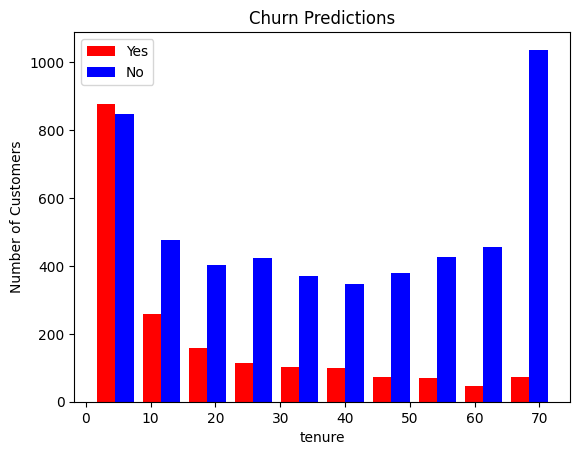

In [ ]:
plt.hist([tc_yes,tc_no],color=['red','blue'], label=['Yes', 'No'])
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('Churn Predictions')
plt.legend()

In [ ]:
def unique_col_values(data):
   for column in data:
     if data[column].dtypes =='object':
       print(f'{column}:  {data[column].unique()}')

In [ ]:
unique_col_values(data2)

gender:  ['Female' 'Male']
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No phone service' 'No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes' 'No internet service']
OnlineBackup:  ['Yes' 'No' 'No internet service']
DeviceProtection:  ['No' 'Yes' 'No internet service']
TechSupport:  ['No' 'Yes' 'No internet service']
StreamingTV:  ['No' 'Yes' 'No internet service']
StreamingMovies:  ['No' 'Yes' 'No internet service']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:  ['No' 'Yes']


In [ ]:
data2.replace('No internet service', 'No', inplace=True)
data2.replace('No phone service', 'No', inplace=True)

<ipython-input-21-7e85cbbc30ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.replace('No internet service', 'No', inplace=True)
<ipython-input-21-7e85cbbc30ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.replace('No phone service', 'No', inplace=True)


In [ ]:
unique_col_values(data2)

gender:  ['Female' 'Male']
Partner:  ['Yes' 'No']
Dependents:  ['No' 'Yes']
PhoneService:  ['No' 'Yes']
MultipleLines:  ['No' 'Yes']
InternetService:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity:  ['No' 'Yes']
OnlineBackup:  ['Yes' 'No']
DeviceProtection:  ['No' 'Yes']
TechSupport:  ['No' 'Yes']
StreamingTV:  ['No' 'Yes']
StreamingMovies:  ['No' 'Yes']
Contract:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling:  ['Yes' 'No']
PaymentMethod:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:  ['No' 'Yes']


In [ ]:
yes_no_columns= ['Partner','Dependents','PhoneService','MultipleLines', 'OnlineSecurity','OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
  data2[col].replace({'Yes': 1, 'No': 0},inplace=True)

In [ ]:
for col in data2:
  print(f'{col}: {data2[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
data2['gender'].replace({'Female':1, 'Male': 0},inplace=True)
data2['PaymentMethod'].replace({'Electronic check':1 ,'Mailed check':1, 'Bank transfer (automatic)':0, 'Credit card (automatic)': 0},inplace=True)

In [ ]:
data2['gender'].unique()

array([1, 0])

In [ ]:
data3 = data2.copy()
label_encoder = LabelEncoder()
columns_to_encode = ['InternetService', 'Contract', 'PaymentMethod']
for column in columns_to_encode:
    data3[column] = label_encoder.fit_transform(data3[column])

In [ ]:
data3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,0,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,1889.50,0
2,0,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,0,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1


In [ ]:
data['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
data3['PaperlessBilling'].unique()

array([1, 0])

In [ ]:
data['SeniorCitizen'].unique()

array([0, 1])

In [ ]:
data3['SeniorCitizen'].unique()

array([0, 1])

In [ ]:
data['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [ ]:
data3['StreamingTV'].unique()

array([0, 1])

In [ ]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [ ]:
data3['PaymentMethod'].unique()

array([1, 0])

In [ ]:
data3.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
columns_scale= ['tenure','MonthlyCharges','TotalCharges']
scaler =StandardScaler()
data3[columns_scale] = scaler.fit_transform(data3[columns_scale])

In [ ]:
data3.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4500,0,0,1,1,1.164390,1,0,1,0,1,1,1,1,1,1,0,0,1.299761,1.837921,0
674,0,1,0,0,0.797694,0,0,0,0,1,0,0,1,1,0,1,1,-0.520153,0.118062,1
4744,0,1,0,0,1.286622,1,0,2,0,0,0,0,0,0,2,1,0,-1.487450,-0.478799,0
5793,0,0,0,0,-0.750577,1,1,0,0,1,0,0,0,0,0,1,0,-0.309077,-0.668730,0
2873,0,0,0,0,-0.302393,1,1,1,0,0,0,0,1,1,0,1,0,0.993949,0.034765,1


In [ ]:
X= data3.drop('Churn', axis='columns')
y= data3['Churn']

In [ ]:
correlation_matrix = data3.corr()

In [ ]:
important_features = correlation_matrix['Churn'].sort_values(ascending=False)
important_features = important_features[~(important_features.index.str.contains('Churn'))]
important_features = important_features.head(5).index.tolist()

print(important_features)

['PaymentMethod', 'MonthlyCharges', 'PaperlessBilling', 'SeniorCitizen', 'StreamingTV']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

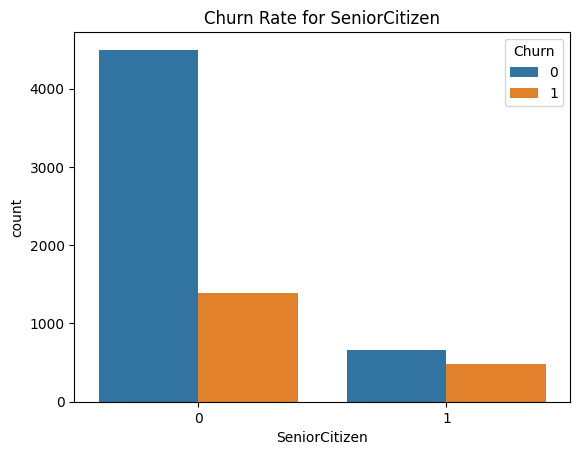

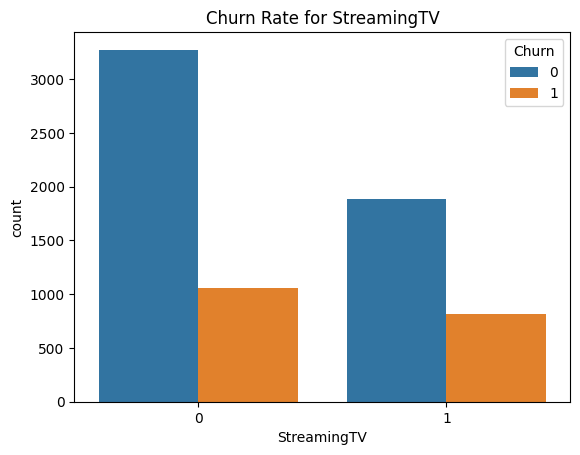

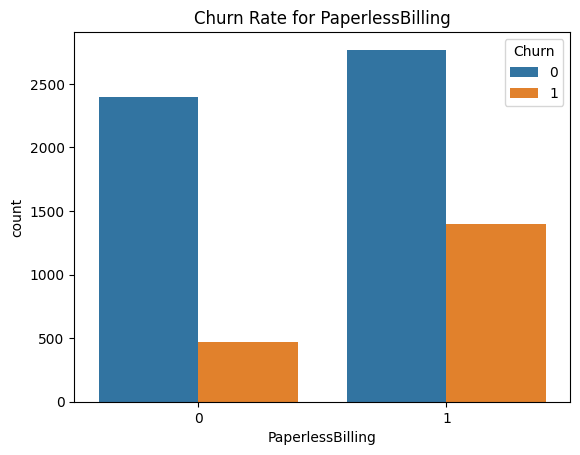

In [ ]:
categorical_vars = ['SeniorCitizen', 'StreamingTV', 'PaperlessBilling']
for var in categorical_vars:
    sns.countplot(x=var, hue='Churn', data=data3)
    plt.title(f'Churn Rate for {var}')
    plt.show()

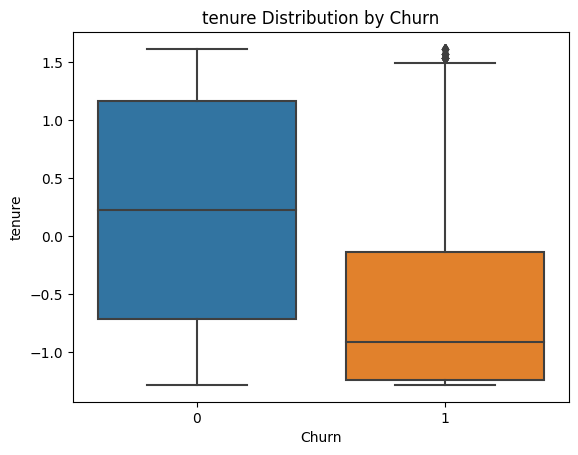

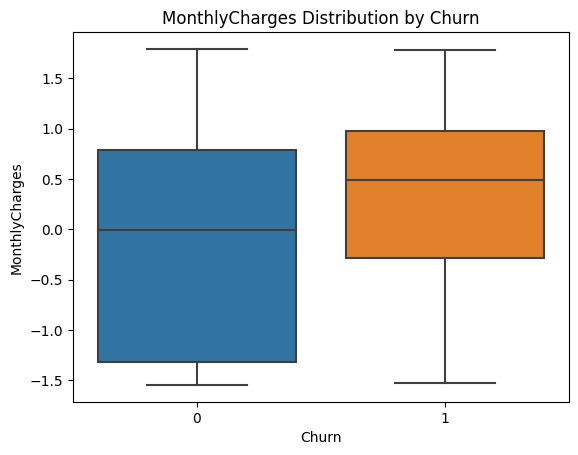

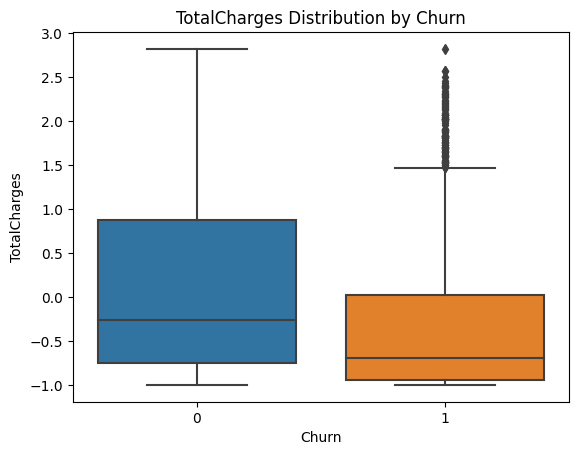

In [ ]:
continuous_vars = ['tenure', 'MonthlyCharges','TotalCharges']
for var in continuous_vars:
    sns.boxplot(x='Churn', y=var, data=data3)
    plt.title(f'{var} Distribution by Churn')
    plt.show()

In [ ]:
X= data3[important_features]
y= data3['Churn']

In [ ]:
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
X= StandardScaler.fit_transform(X.copy())
X= pd.DataFrame(X, columns = important_features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=5)

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
input_layer = Input(shape=(X_train.shape[1],))


hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)



output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=120, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/120
176/176 [==============================] - 3s 10ms/step - loss: 0.6818 - accuracy: 0.5653 - val_loss: 0.6488 - val_accuracy: 0.6773
Epoch 2/120
176/176 [==============================] - 2s 11ms/step - loss: 0.6113 - accuracy: 0.7349 - val_loss: 0.5960 - val_accuracy: 0.7093
Epoch 3/120
176/176 [==============================] - 1s 8ms/step - loss: 0.5621 - accuracy: 0.7403 - val_loss: 0.5645 - val_accuracy: 0.7100
Epoch 4/120
176/176 [==============================] - 1s 4ms/step - loss: 0.5346 - accuracy: 0.7403 - val_loss: 0.5526 - val_accuracy: 0.7100
Epoch 5/120
176/176 [==============================] - 0s 3ms/step - loss: 0.5241 - accuracy: 0.7403 - val_loss: 0.5485 - val_accuracy: 0.7100
Epoch 6/120
176/176 [==============================] - 0s 3ms/step - loss: 0.5198 - accuracy: 0.7403 - val_loss: 0.5460 - val_accuracy: 0.7100
Epoch 7/120
176/176 [==============================] - 1s 4ms/step - loss: 0.5175 - accuracy: 0.7403 - val_loss: 0.5442 - val_accuracy: 0.71

In [ ]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.7186


[0.5308846831321716, 0.7185500860214233]

In [ ]:
y_pred= model.predict(X_test)
y_pred[:5]

44/44 [==============================] - 0s 1ms/step


array([[0.15630071],
       [0.12245921],
       [0.14751026],
       [0.31244904],
       [0.43790254]], dtype=float32)

In [ ]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

176/176 [==============================] - 0s 2ms/step - loss: 0.4998 - accuracy: 0.7575


75.75111389160156

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy*100:.4f}')

44/44 [==============================] - 0s 2ms/step - loss: 0.5309 - accuracy: 0.7186
Test Loss: 0.5309
Test Accuracy: 71.8550


In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [ ]:
import keras_tuner
from tensorflow import keras

In [ ]:
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.InputLayer(input_shape=(X_train.shape[1],)))

    # Tune the number of hidden layers and units
    for i in range(hp.Int('num_hidden_layers', min_value=1, max_value=4)):
        model.add(keras.layers.Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=96, step=32),
                             activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh'])))

    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Tunning the learning rate
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
        )

    return model

In [ ]:
build_model(keras_tuner.HyperParameters())

In [ ]:
tuner = keras_tuner.Hyperband(
  hypermodel=build_model,
  objective='val_accuracy',
  max_epochs=100,
  factor=3,
  directory='tuning_dir',
  project_name='samples')

In [ ]:
tuner.search(X_train, y_train, epochs=30 ,validation_data=(X_test, y_test))

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 10
num_hidden_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 96, 'step': 32, 'sampling': 'linear'}
activation_2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_3 (Int)
{'default': None

In [ ]:
tuner.results_summary()

Results summary
Results in tuning_dir/samples
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0143 summary
Hyperparameters:
num_hidden_layers: 1
units_0: 64
activation_0: relu
lr: 0.007729069572956419
units_1: 64
activation_1: relu
units_2: 64
activation_2: relu
units_3: 64
activation_3: relu
tuner/epochs: 34
tuner/initial_epoch: 12
tuner/bracket: 4
tuner/round: 3
tuner/trial_id: 0131
Score: 0.7427150011062622

Trial 0146 summary
Hyperparameters:
num_hidden_layers: 1
units_0: 64
activation_0: relu
lr: 0.007729069572956419
units_1: 64
activation_1: relu
units_2: 64
activation_2: relu
units_3: 64
activation_3: relu
tuner/epochs: 100
tuner/initial_epoch: 34
tuner/bracket: 4
tuner/round: 4
tuner/trial_id: 0143
Score: 0.7405828237533569

Trial 0205 summary
Hyperparameters:
num_hidden_layers: 3
units_0: 32
activation_0: relu
lr: 0.0013270401502239939
units_1: 96
activation_1: relu
units_2: 32
activation_2: tanh
units_3: 96
activation_3: tanh
tuner/epochs: 34
tun

In [ ]:
good_model = tuner.get_best_models(num_models=2)[0]

In [ ]:
good_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 449 (1.75 KB)
Trainable params: 449 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
test_accuracy = good_model.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {test_accuracy:.4f}")

44/44 [==============================] - 1s 3ms/step - loss: 0.5302 - accuracy: 0.7427
Test Accuracy: 0.7427


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = good_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
auc_score = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")

In [1]:
good_model.save("good_model.h5")

NameError: ignored

In [ ]:
import pickle
with open('standard_scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)

In [ ]:
data3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,-1.280248,0,0,0,0,1,0,0,0,0,0,1,1,-1.161694,-0.994194,0
1,0,0,0,0,0.064303,1,0,0,1,0,1,0,0,0,1,0,1,-0.260878,-0.173740,0
2,0,0,0,0,-1.239504,1,0,0,1,1,0,0,0,0,0,1,1,-0.363923,-0.959649,1
3,0,0,0,0,0.512486,0,0,0,1,0,1,1,0,0,1,0,0,-0.747850,-0.195248,0
4,1,0,0,0,-1.239504,1,0,1,0,0,0,0,0,0,0,1,1,0.196178,-0.940457,1
